In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data = {
    'CustomerID': range(1, 201),
    'Gender': np.random.choice(['Male', 'Female'], 200),
    'Age': np.random.randint(18, 70, 200),
    'Annual Income (k$)': np.random.randint(15, 138, 200),
    'Spending Score (1-100)': np.random.randint(1, 100, 200)
}

df = pd.DataFrame(data)

print("Primeras 5 filas del dataset:")
print(df.head())
print("\nInformación general del dataset:")
df.info()
# Suponiendo que el archivo se llama 'Mall_Customers.csv'
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.info()

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv
Primeras 5 filas del dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1  Female   39                 135                      89
1           2  Female   58                  63                      27
2           3  Female   69                 135                      51
3           4    Male   26                  33                      60
4           5    Male   48                  54                      82

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score 

In [2]:
# Seleccionamos solo las columnas relevantes (X)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

print("\nEstadísticas descriptivas de las variables a usar:")
print(X.describe())


Estadísticas descriptivas de las variables a usar:
       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000


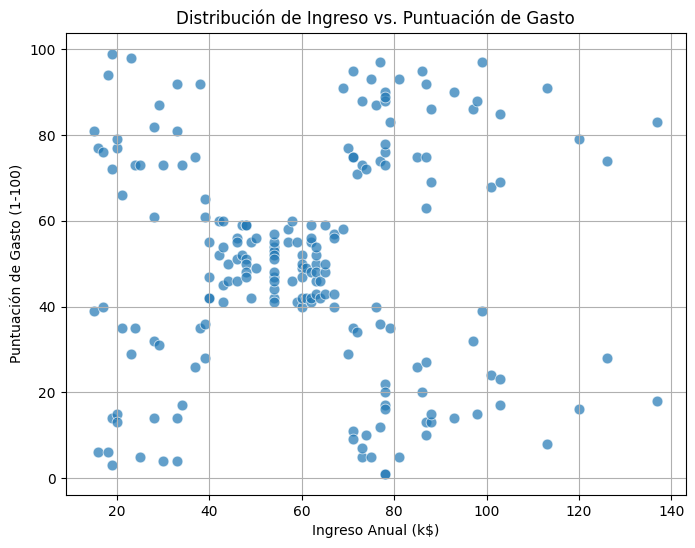

In [3]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=X, s=60, alpha=0.7)
plt.title('Distribución de Ingreso vs. Puntuación de Gasto')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.grid(True)
plt.show()

In [4]:
scaler = StandardScaler()
# Transformamos la data X
X_scaled = scaler.fit_transform(X)

print("\nPrimeras filas de los datos escalados (Numpy Array):")
print(X_scaled[:5])


Primeras filas de los datos escalados (Numpy Array):
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


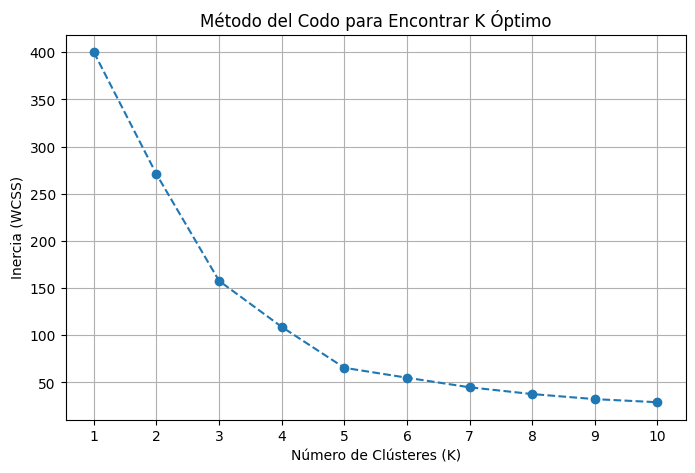

In [5]:
# Lista para almacenar la inercia para cada valor de K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Gráfico del Método del Codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Método del Codo para Encontrar K Óptimo')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia (WCSS)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [6]:
# Inicializar y entrenar el modelo K-Means con K=5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Asignar las etiquetas de clústeres al DataFrame original
df['Cluster'] = kmeans.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


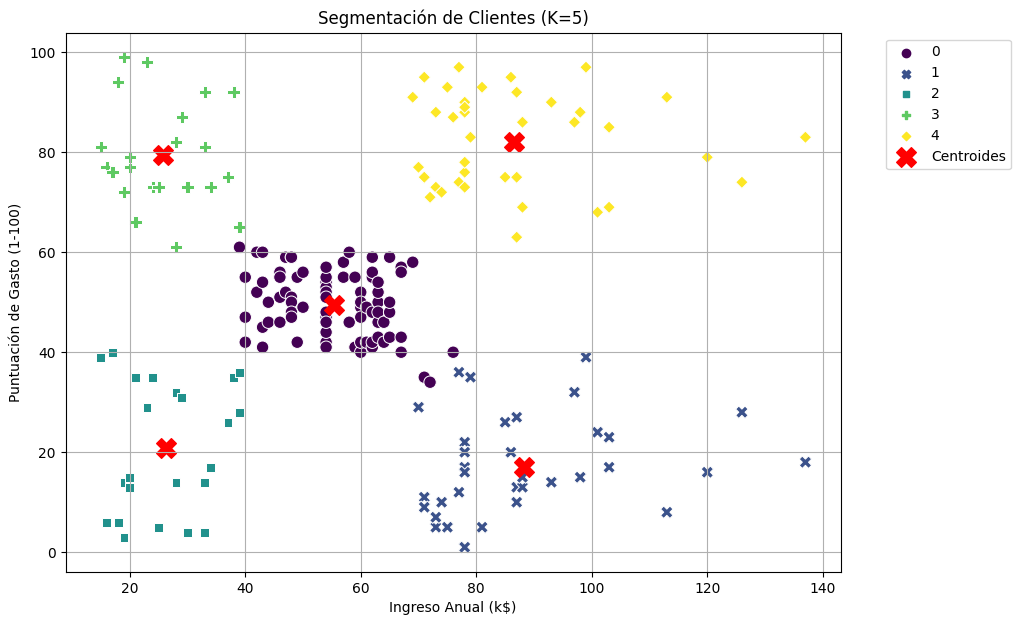

In [7]:
# Centroides en el espacio escalado
centroids_scaled = kmeans.cluster_centers_

# Revertir la escala de los centroides para interpretarlos
centroids_original = scaler.inverse_transform(centroids_scaled)
centroids_df = pd.DataFrame(centroids_original, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df,
                palette='viridis', style='Cluster', s=80, legend='full')

# Dibujar los centroides
plt.scatter(centroids_df['Annual Income (k$)'], centroids_df['Spending Score (1-100)'],
            marker='X', s=200, color='red', label='Centroides')

plt.title(f'Segmentación de Clientes (K={optimal_k})')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(True)
plt.show()

In [8]:
print("\nCentroides de los Clústeres (en unidades originales):")
print(centroids_df)


Centroides de los Clústeres (en unidades originales):
   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           88.200000               17.114286
2           26.304348               20.913043
3           25.727273               79.363636
4           86.538462               82.128205


In [9]:
# Rango de K de 2 a 10
K_range = range(2, 11)
silhouette_scores = []
inertia_values = [] # Reutilizamos la inercia para compararla

for k in K_range:
    # 1. Modelar
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_

    # 2. Evaluar
    # Almacenar Inercia
    inertia_values.append(kmeans.inertia_)
    # Almacenar Puntuación de la Silueta
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

print("Resultados de Evaluación:")
for k, score, wcss in zip(K_range, silhouette_scores, inertia_values):
    print(f"K={k}: Silueta = {score:.4f}, Inercia = {wcss:.2f}")

Resultados de Evaluación:
K=2: Silueta = 0.3147, Inercia = 270.70
K=3: Silueta = 0.4666, Inercia = 157.70
K=4: Silueta = 0.4939, Inercia = 108.92
K=5: Silueta = 0.5547, Inercia = 65.57
K=6: Silueta = 0.5399, Inercia = 55.06
K=7: Silueta = 0.5263, Inercia = 44.91
K=8: Silueta = 0.4558, Inercia = 37.74
K=9: Silueta = 0.4553, Inercia = 32.38
K=10: Silueta = 0.4476, Inercia = 29.09


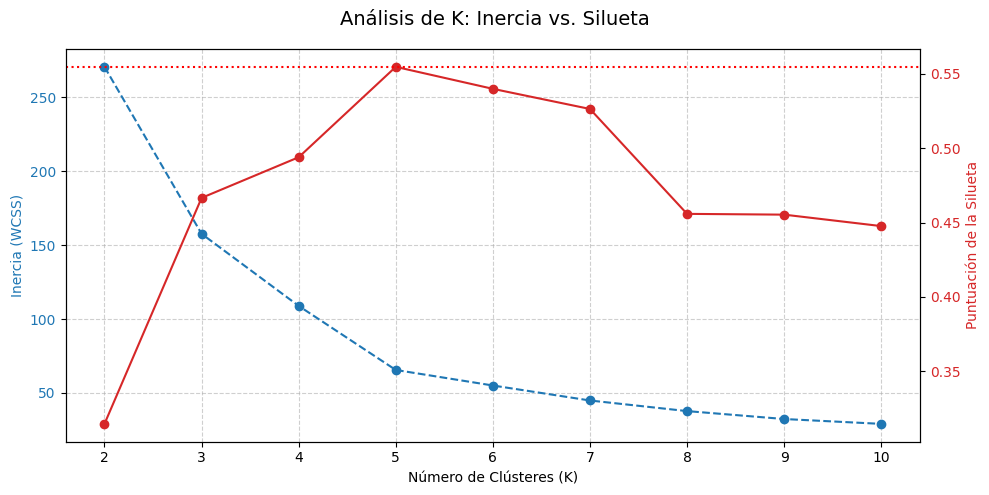

In [10]:
# Crear figura con dos subgráficos
fig, ax1 = plt.subplots(figsize=(10, 5))

# Gráfico de la Inercia (Método del Codo)
color = 'tab:blue'
ax1.set_xlabel('Número de Clústeres (K)')
ax1.set_ylabel('Inercia (WCSS)', color=color)
ax1.plot(K_range, inertia_values, marker='o', linestyle='--', color=color, label='Inercia')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.6)

# Crear un segundo eje Y para la Puntuación de la Silueta
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Puntuación de la Silueta', color=color)
ax2.plot(K_range, silhouette_scores, marker='o', linestyle='-', color=color, label='Silueta')
ax2.tick_params(axis='y', labelcolor=color)
ax2.axhline(y=np.max(silhouette_scores), color='red', linestyle=':', label='Máx. Silueta')

# Título y Mostrar
fig.suptitle('Análisis de K: Inercia vs. Silueta', fontsize=14)
fig.tight_layout()
plt.xticks(K_range)
plt.show()